## Imports

In [1]:

import sys
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', 400)

import canalyst_candas.candas as cd
import canalyst_candas.candas_datareader as cdr
from canalyst_candas.configuration.config import Config

config_info = {
  "canalyst_api_key": "",
  "s3_access_key_id": "",
  "s3_secret_key": "",
  "fred_key": "",
  "default_dir": "",
  "mds_host": "",
  "wp_host": ""
}

config = Config(config=config_info)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


## Coverage list of airline stocks

In [2]:
ticker_list = [
    'ALK US',
    'AAL US',
    'JBLU US',
    'UAL US'
]

## Run a search within our ticker list for anything related to fuel cost

Building guidance index...
Done


,ticker,CSIN,Path,Filename,time_series_description,time_series_name,Fiscal Period,Low,Mid,High,Type.1,Date,Link,search_matches
30133,UAL US,K25QNC0129,US Companies/Industrials/Transportation/Airlines,United Airlines Holdings UAL US.xlsx,"Fuel costs per gallon, $/gal",MO_OS_FuelCost,Q4-2021,2.39,2.39,2.39,Estimate,2021-10-19 00:00:00,Press Release,1
28519,JBLU US,9P9H220191,US Companies/Industrials/Transportation/Airlines,JetBlue Airways JBLU US.xlsx,"Fuel costs per gallon, $/gal",z_9P9H220191_MO_OS_Fuelcostspergallon_1,Q4-2021,2.49,2.49,2.49,Estimate,2021-10-26 00:00:00,Earnings Presentation,1
35009,ALK US,E82OUG0135,US Companies/Industrials/Transportation/Airlines,Alaska Air Group ALK US.xlsx,"Consolidated economic fuel expense per gallon, $/gal",MO_OS_FuelCost_Adj,Q4-2021,2.25,2.27,2.3,Estimate,2021-10-21 00:00:00,Investor Update,1


<AxesSubplot:title={'center':'Q4 Watch List Fuel Cost Guidance'}, xlabel='ticker'>

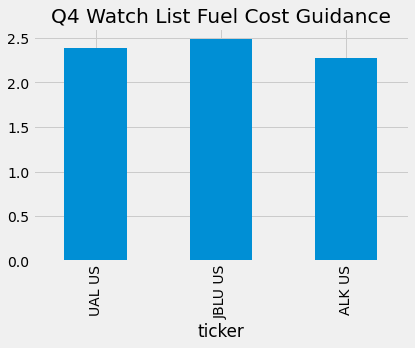

In [3]:
canalyst_search = cd.Search(config=config)
df_guidance = canalyst_search.search_guidance_time_series(ticker=ticker_list,
                     time_series_name="fuelcost")
display(df_guidance)
df_guidance.plot(x='ticker',y="Mid",kind='bar',title="Q4 Watch List Fuel Cost Guidance",legend=None)

## Create a temporary model set of just the guidance names

In [4]:
model_set_guidance = cd.ModelSet(ticker_list=['UAL US','JBLU US','ALK US'], 
                        config=config, 
                        allow_nulls=True)

## Let's look at the time series of these guidance items

In [5]:
time_series_names = ['MO_OS_FuelCost']
model_set_guidance.model_frame(time_series_names,
                      pivot=True,
                      n_periods=12,
                      is_historical=True,
                      period_duration_type='fiscal_quarter')

period_name_sorted,ticker,name_index,category,time_series_name,time_series_description,is_driver,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3
1,JBLU US,31,Operating Stats - Traffic Data and Fuel Costs (PR),MO_OS_FuelCost,"Average fuel costs per gallon, $/gal",False,2.25,2.05,2.16,2.06,2.08,1.85,0.97,1.23,1.32,1.72,1.91,2.08
0,ALK US,49,Operating Stats - Traffic Data and Fuel Costs (PR),MO_OS_FuelCost,"Raw fuel cost per gallon, $/gal",False,2.35,2.12,2.25,2.12,2.18,1.91,1.11,1.27,1.38,1.76,1.96,2.17
2,UAL US,317,Operating Statistics - Aircraft Fuel (PR),MO_OS_FuelCost,"Fuel costs per gallon, $/gal",False,2.30,2.05,2.16,2.02,2.10,1.90,1.18,1.31,1.35,1.74,1.97,2.14


In [6]:
print("Year over Year Fuel Cost Growth Implied by Guidance")
print("JBLU = "+str(round(2.49/1.32-1,2)))
print("ALK = "+str(round(2.27/1.76-1,2)))
print("UAL = "+str(round(2.39/1.35-1,2)))

Year over Year Fuel Cost Growth Implied by Guidance
JBLU = 0.89
ALK = 0.29
UAL = 0.77


## Plot the time series

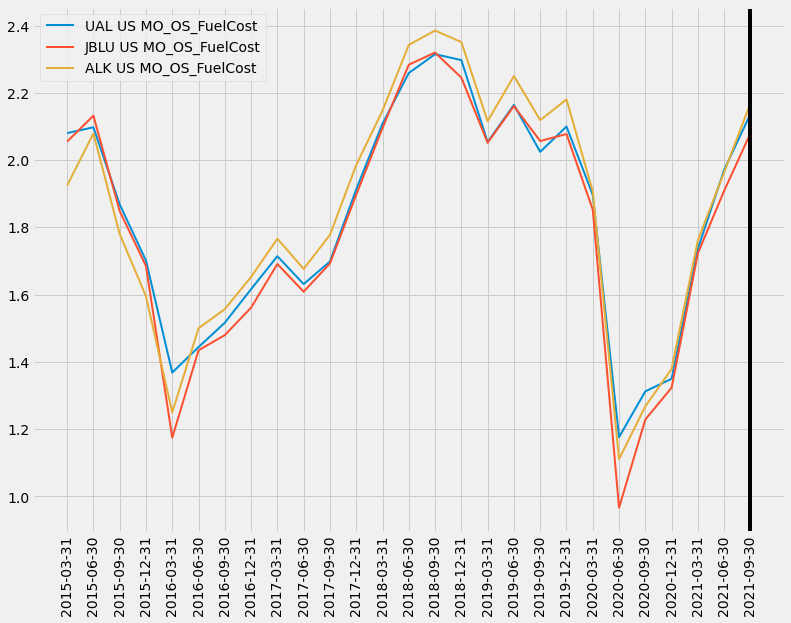

In [7]:
model_set_guidance.create_time_series_chart(time_series_name='MO_OS_FuelCost',
                                   historical=True)

## What is the year on year growth of the guidance time series in the models?

### Actuals MO_OS_FuelCost

In [8]:
model_set_guidance.model_frame(time_series_names,
                      pivot=True,
                      n_periods=16,
                      period_duration_type='fiscal_quarter').drop(columns=['2022Q1','2022Q2','2022Q3','2022Q4'])


period_name_sorted,ticker,name_index,category,time_series_name,time_series_description,is_driver,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4
1,JBLU US,31,Operating Stats - Traffic Data and Fuel Costs (PR),MO_OS_FuelCost,"Average fuel costs per gallon, $/gal",False,2.05,2.16,2.06,2.08,1.85,0.97,1.23,1.32,1.72,1.91,2.08,2.45
0,ALK US,49,Operating Stats - Traffic Data and Fuel Costs (PR),MO_OS_FuelCost,"Raw fuel cost per gallon, $/gal",False,2.12,2.25,2.12,2.18,1.91,1.11,1.27,1.38,1.76,1.96,2.17,2.76
2,UAL US,317,Operating Statistics - Aircraft Fuel (PR),MO_OS_FuelCost,"Fuel costs per gallon, $/gal",False,2.05,2.16,2.02,2.10,1.90,1.18,1.31,1.35,1.74,1.97,2.14,2.39


### 4 period (year over year) growth rates MO_OS_FuelCost

In [9]:
df_imputed = model_set_guidance.model_frame(time_series_names,
                      pivot=True,
                      n_periods=16,
                      n_diff = 4,
                      period_duration_type='fiscal_quarter')[['ticker','time_series_name','time_series_description','2021Q1','2022Q2','2021Q3','2021Q4']]
df_imputed

period_name_sorted,ticker,time_series_name,time_series_description,2021Q1,2022Q2,2021Q3,2021Q4
1,JBLU US,MO_OS_FuelCost,"Average fuel costs per gallon, $/gal",-0.07,0.01,0.69,0.85
0,ALK US,MO_OS_FuelCost,"Raw fuel cost per gallon, $/gal",-0.08,0.05,0.71,1.00
2,UAL US,MO_OS_FuelCost,"Fuel costs per gallon, $/gal",-0.08,0.10,0.63,0.77


## Other than guidance, what fuel costs time series are available to us 

## Which are also key drivers of the models

In [10]:
canalyst_search.search_time_series(ticker=ticker_list,
                     is_driver=True,
                     time_series_name="fuelcost")

Building search index...
Done


,ticker,CSIN,Path,Filename,category,time_series_description,time_series_name,period_duration_type,unit_type,is_driver,value,search_matches
228749,UAL US,K25QNC0129,US Companies/Industrials/Transportation/Airlines,United Airlines Holdings UAL US.xlsx,Operating Statistics - Aircraft Fuel (PR),"Fuel costs per gallon growth, %",z_K25QNC0129_MO_OS_Fuelcostspergallongrowth,fiscal_quarter,percentage,True,62.84,1
216419,JBLU US,9P9H220191,US Companies/Industrials/Transportation/Airlines,JetBlue Airways JBLU US.xlsx,Operating Statistics - Aircraft Fuel and Related Taxes (PR),"Fuel costs per gallon growth, %",z_9P9H220191_MO_OS_Fuelcostspergallongrowth,fiscal_quarter,percentage,True,69.24,1
270517,ALK US,E82OUG0135,US Companies/Industrials/Transportation/Airlines,Alaska Air Group ALK US.xlsx,Operating Stats - Aircraft Fuel (PR),"Raw fuel cost per gallon growth, %",z_E82OUG0135_MO_OS_Rawfuelcostpergallongrowth,fiscal_quarter,percentage,True,71.08,1
194328,AAL US,DYKK2Y0171,US Companies/Industrials/Transportation/Airlines,American Airlines AAL US.xlsx,Operating Statistics - Aircraft Fuel and Related Taxes (PR),"Fuel costs per gallon growth, %",z_DYKK2Y0171_MO_OS_Fuelcostspergallongrowth,fiscal_quarter,percentage,True,69.41,1


## Now let's make a ModelSet of our full ticker list

In [11]:
model_set = cd.ModelSet(ticker_list=ticker_list, config=config, allow_nulls=True)

## Boiling down to the fuel cost time series identified in our Search

In [12]:
time_series_names = [
                 'z_K25QNC0129_MO_OS_Fuelcostspergallongrowth',
                 'z_9P9H220191_MO_OS_Fuelcostspergallongrowth',
                  'z_E82OUG0135_MO_OS_Rawfuelcostpergallongrowth',
                  'z_DYKK2Y0171_MO_OS_Fuelcostspergallongrowth'
                 ]

## Make a chart

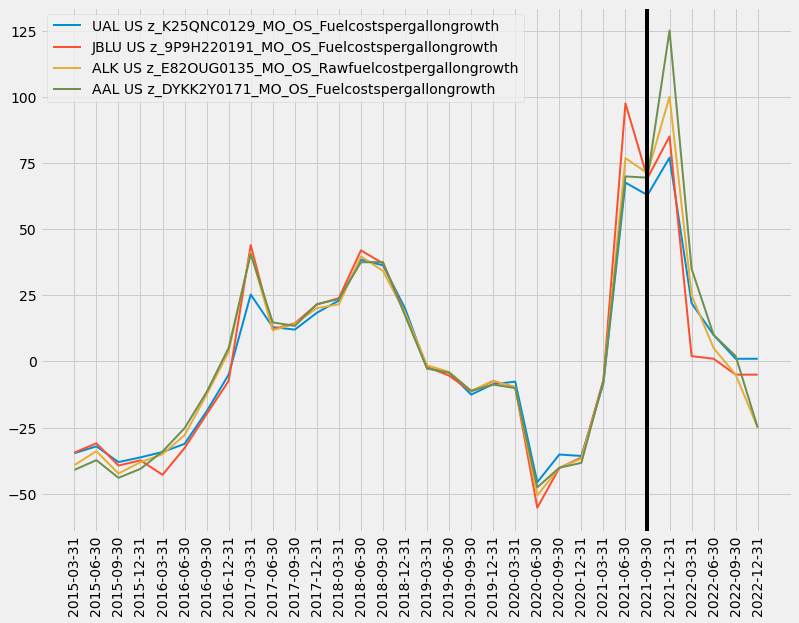

In [13]:
model_set.create_time_series_chart(time_series_name=time_series_names,
                                   historical=False)

## Let's get economic data for the current (Q4) state of fuel costs

<AxesSubplot:xlabel='quarter'>

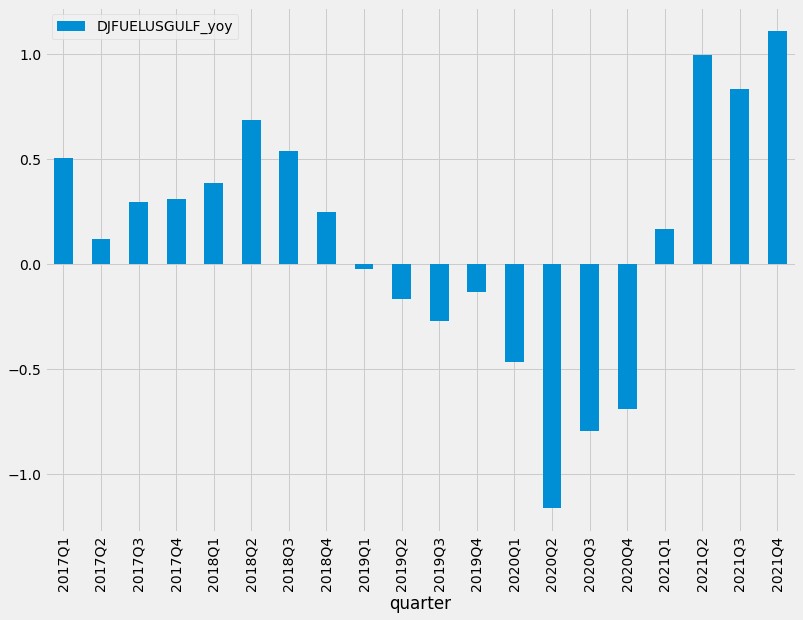

In [14]:
import canalyst_candas.candas_datareader as cdr
df = cdr.get_fred_data(['DJFUELUSGULF'], config)
df['DJFUELUSGULF_yoy'] = df['DJFUELUSGULF'].diff(periods=4)
df = df.dropna()
df.plot(x='quarter',y='DJFUELUSGULF_yoy',kind='bar')

In [15]:
df.tail(4)

,quarter,DJFUELUSGULF,DJFUELUSGULF_yoy
20,2021Q1,1.57,0.17
21,2021Q2,1.76,1.00
22,2021Q3,1.90,0.83
23,2021Q4,2.28,1.11


## Let's use the scenario engine to get the EPS sensitivity for each stock to this item

In [16]:
return_series = "MO_RIS_EPS_WAD_Adj"
list_output = []
for ts in time_series_names:
    df_params = model_set.forecast_frame(ts,
                             n_periods=-1,
                             function_name='multiply',
                             function_value=(1.1))
    dicts_output=model_set.fit(df_params,return_series)
    for key in dicts_output.keys():
        list_output.append(dicts_output[key].head(1))

UAL US scenario_id_url: https://mds.canalyst.com/api/equity-model-series/K25QNC0129/equity-models/Q3-2021.23/scenarios/HhNTK0oUXeCwALkjoJYyRg/
JBLU US scenario_id_url: https://mds.canalyst.com/api/equity-model-series/9P9H220191/equity-models/Q3-2021.23/scenarios/hVMQ7WBkU_StmBr2wu16Jw/
ALK US scenario_id_url: https://mds.canalyst.com/api/equity-model-series/E82OUG0135/equity-models/Q3-2021.25/scenarios/mNMY8fvBXvSOKCVhWp1Wew/
AAL US scenario_id_url: https://mds.canalyst.com/api/equity-model-series/DYKK2Y0171/equity-models/Q3-2021.23/scenarios/JjFZGmSjUzyCPkG3F0EUKw/


In [17]:
import numpy as np
df = pd.concat(list_output)
df['eps_change'] = np.where(df['default']>0,(df['scenario'].astype(float)-df['default'].astype(float))/df['default'].astype(float),(df['default'].astype(float)-df['scenario'].astype(float))/df['default'].astype(float))
df.sort_values('eps_change')

,ticker,period_name,time_series_name,time_series_description,default,scenario,diff,eps_change
0,ALK US,Q4-2021,MO_RIS_EPS_WAD_Adj,Adjusted Earnings Per Share - WAD,0.14287,-0.0033713543,-0.02360,-1.02360
0,JBLU US,Q4-2021,MO_RIS_EPS_WAD_Adj,Adjusted Earnings Per Share - WAD,-0.28869,-0.3390819929,1.17454,-0.17454
0,AAL US,Q4-2021,MO_RIS_EPS_WAD_Adj,Adjusted Earnings Per Share - WAD,-1.47153,-1.659465816,1.12772,-0.12772
0,UAL US,Q4-2021,MO_RIS_EPS_WAD_Adj,Adjusted Earnings Per Share - WAD,-3.10961,-3.3378424315,1.07339,-0.07339


In [18]:
model_set.model_frame(time_series_names,
                      pivot=True,
                      n_periods=12,
                      period_duration_type='fiscal_quarter').drop(columns=['category','name_index','2022Q1','2022Q2','2022Q3','2022Q4'])

period_name_sorted,ticker,time_series_name,time_series_description,is_driver,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4
2,JBLU US,z_9P9H220191_MO_OS_Fuelcostspergallongrowth,"Fuel costs per gallon growth, %",True,-9.69230,-55.26171,-40.25017,-36.29606,-6.99364,97.49216,69.23962,85.00000
0,AAL US,z_DYKK2Y0171_MO_OS_Fuelcostspergallongrowth,"Fuel costs per gallon growth, %",True,-10.06670,-47.57571,-40.16335,-38.32147,-7.34084,69.87415,69.41409,125.00000
3,UAL US,z_K25QNC0129_MO_OS_Fuelcostspergallongrowth,"Fuel costs per gallon growth, %",True,-7.64939,-45.64065,-35.16733,-35.71616,-8.43403,67.55200,62.83711,77.00000
1,ALK US,z_E82OUG0135_MO_OS_Rawfuelcostpergallongrowth,"Raw fuel cost per gallon growth, %",True,-9.84891,-50.61728,-40.15689,-36.74500,-7.61905,76.78571,71.08268,100.00000


In [19]:
display(df_imputed)

period_name_sorted,ticker,time_series_name,time_series_description,2021Q1,2022Q2,2021Q3,2021Q4
1,JBLU US,MO_OS_FuelCost,"Average fuel costs per gallon, $/gal",-0.06994,0.01000,0.69240,0.85000
0,ALK US,MO_OS_FuelCost,"Raw fuel cost per gallon, $/gal",-0.07619,0.05000,0.71083,1.00000
2,UAL US,MO_OS_FuelCost,"Fuel costs per gallon, $/gal",-0.08434,0.10000,0.62837,0.77000


## What are the current estimates in Canalyst models

In [20]:
model_set.model_frame('MO_RIS_EPS_WAD_Adj',
                      pivot=True,
                      n_periods=12,
                      period_duration_type='fiscal_quarter').drop(columns=['category','name_index','2022Q1','2022Q2','2022Q3','2022Q4'])

period_name_sorted,ticker,time_series_name,time_series_description,is_driver,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4
2,JBLU US,MO_RIS_EPS_WAD_Adj,Adjusted Earnings Per Share - WAD,False,-0.41847,-2.01693,-1.75110,-1.50299,-1.47645,-0.64841,-0.12138,-0.28869
0,AAL US,MO_RIS_EPS_WAD_Adj,Adjusted Earnings Per Share - WAD,False,-2.65202,-7.82170,-5.53581,-3.86374,-4.32235,-1.69222,-0.98834,-1.47153
3,UAL US,MO_RIS_EPS_WAD_Adj,Adjusted Earnings Per Share - WAD,False,-2.57143,-9.30887,-8.15808,-6.99327,-7.50158,-3.90606,-1.00000,-3.10961
1,ALK US,MO_RIS_EPS_WAD_Adj,Adjusted Earnings Per Share - WAD,False,-0.83050,-3.56054,-3.22693,-2.54812,-3.50767,-0.30406,1.47026,0.14287


## What are the current Street estimates

In [21]:
print("JBLU")
display(cdr.get_earnings_estimates('JBLU'))
print("AAL")
display(cdr.get_earnings_estimates('AAL'))
print("UAL")
display(cdr.get_earnings_estimates('UAL'))
print("ALK")
display(cdr.get_earnings_estimates('ALK'))

JBLU


,Earnings Estimate,Current Qtr. (Dec 2021),Next Qtr. (Mar 2022),Current Year (2021),Next Year (2022)
0,No. of Analysts,14.00000,7.00000,14.00000,14.00000
1,Avg. Estimate,-0.38000,-0.35000,-2.61000,0.72000
2,Low Estimate,-0.49000,-0.52000,-2.73000,0.20000
3,High Estimate,-0.29000,-0.20000,-2.51000,1.75000
4,Year Ago EPS,-1.53000,-1.48000,-5.68000,-2.61000


AAL


,Earnings Estimate,Current Qtr. (Dec 2021),Next Qtr. (Mar 2022),Current Year (2021),Next Year (2022)
0,No. of Analysts,15.00000,7.00000,14.00000,17.00000
1,Avg. Estimate,-1.74000,-1.22000,-8.53000,-0.10000
2,Low Estimate,-2.08000,-1.54000,-8.80000,-1.76000
3,High Estimate,-1.40000,-0.70000,-7.00000,1.95000
4,Year Ago EPS,-3.86000,-4.32000,-19.66000,-8.53000


UAL


,Earnings Estimate,Current Qtr. (Dec 2021),Next Qtr. (Mar 2022),Current Year (2021),Next Year (2022)
0,No. of Analysts,16.00000,8.00000,18.00000,18.00000
1,Avg. Estimate,-2.11000,-2.24000,-14.35000,2.06000
2,Low Estimate,-2.69000,-2.88000,-15.73000,-1.37000
3,High Estimate,-1.48000,-0.50000,-12.00000,4.29000
4,Year Ago EPS,-7.00000,-7.50000,-27.57000,-14.35000


ALK


,Earnings Estimate,Current Qtr. (Dec 2021),Next Qtr. (Mar 2022),Current Year (2021),Next Year (2022)
0,No. of Analysts,14.00000,6.00000,12.00000,14.00000
1,Avg. Estimate,0.25000,-0.49000,-2.03000,4.65000
2,Low Estimate,0.13000,-0.75000,-2.19000,3.55000
3,High Estimate,0.46000,-0.23000,-1.70000,6.29000
4,Year Ago EPS,-2.55000,-3.51000,-10.17000,-2.03000


## Is EPS important to UAL

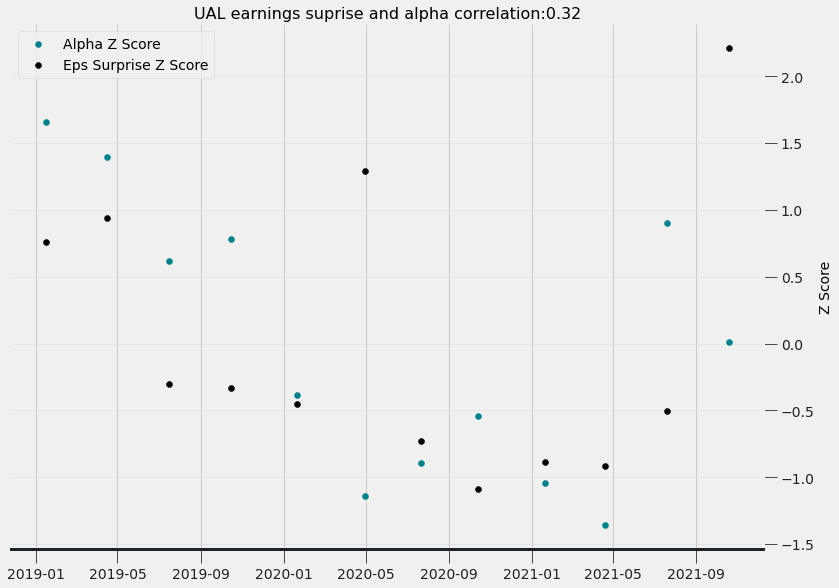

In [22]:
canalyst_ticker = "UAL US"
price_ticker = "UAL" #need this for prices
index_ticker = "^GSPC" #this is our benchmark index (^GSPC for S&P 500, EFA for msci eafa etc)
df = cdr.get_earnings_and_prices(price_ticker,index_ticker = index_ticker) 
cdr.plot_eps_surprise_data(df[df['earnings_date']>'2019-01-01'],'alpha_1_day') 

## Is EPS an important metric for ALK

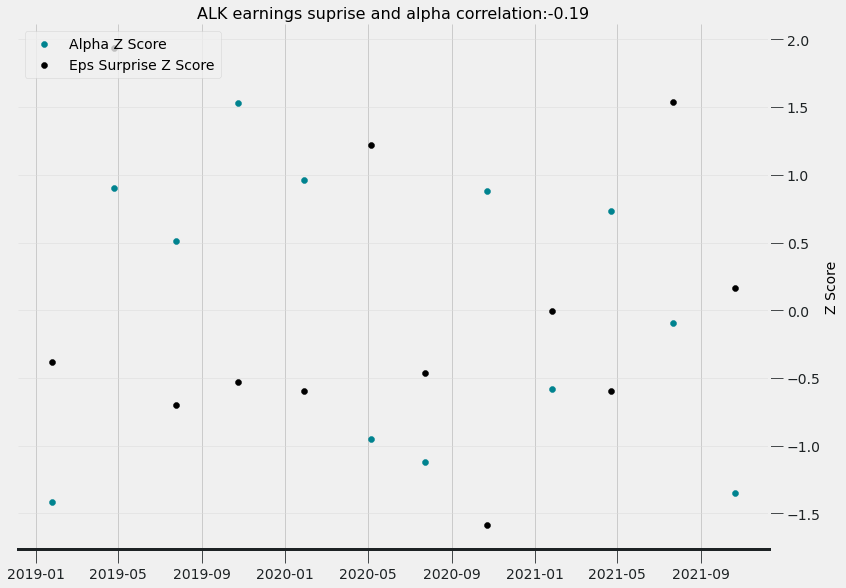

In [23]:
canalyst_ticker = "ALK US"
price_ticker = "ALK" #need this for prices
index_ticker = "^GSPC" #this is our benchmark index (^GSPC for S&P 500, EFA for msci eafa etc)
df = cdr.get_earnings_and_prices(price_ticker,index_ticker = index_ticker) 
cdr.plot_eps_surprise_data(df[df['earnings_date']>'2019-01-01'],'alpha_1_day') 

## If not, what time series is important to ALK

In [24]:
categories = list(model_set.model_frame(ticker=canalyst_ticker,
                      period_duration_type = "fiscal_quarter", 
                      mrq=True)['category'].unique())
like_list = ['Stats','Analysis','Metrics','Segmented Results']
category_filter = []
for category in categories:
    for like in like_list:
        if like in category:
            category_filter.append(category)
            
category_filter = list(set(category_filter))
df_data = model_set.pe_dataset(canalyst_ticker,price_ticker,index_ticker)
df_kpi = cdr.regress_dataframe_time_series_groups(df_data = df_data,
                                         y_name='alpha_1_day',
                                         return_grouped=True,
                                         category = category_filter,
                                         n_periods=8)
df_kpi[['ticker','time_series_description','category','rsquared','n_periods']].head(10)

,ticker,time_series_description,category,rsquared,n_periods
245,ALK US,"Selling expenses per RPM, cents/RPM",Operating Stats - Selling Expenses (PR),0.56431,8.00000
247,ALK US,"Selling expenses per passenger, $/passenger",Operating Stats - Selling Expenses (PR),0.51164,8.00000
422,ALK US,"Selling expenses margin, %",Margin Analysis,0.47888,8.00000
241,ALK US,"Selling expenses margin, %",Operating Stats - Selling Expenses (PR),0.47888,8.00000
268,ALK US,"Food and beverage service per passenger growth, %",Operating Stats - Food and Beverage Service (PR),0.47663,8.00000
96,ALK US,"Regional passenger mile yield growth, %","Segmented Results - Regional (PR, 10-Q/K)",0.37196,8.00000
175,ALK US,"Total aircraft fuel expense per passenger growth, %",Operating Stats - Aircraft Fuel (PR),0.36259,8.00000
379,ALK US,"Mainline Operating Income per aircraft growth, %",Key Metrics - Mainline Aircraft (PR),0.35051,8.00000
246,ALK US,"Selling expenses per RPM growth, %",Operating Stats - Selling Expenses (PR),0.34486,8.00000
317,ALK US,"Total Passenger Revenue per passenger growth, %",Key Metrics - Passengers (PR),0.33876,8.00000


## How has fuel cost importance trended for ALK

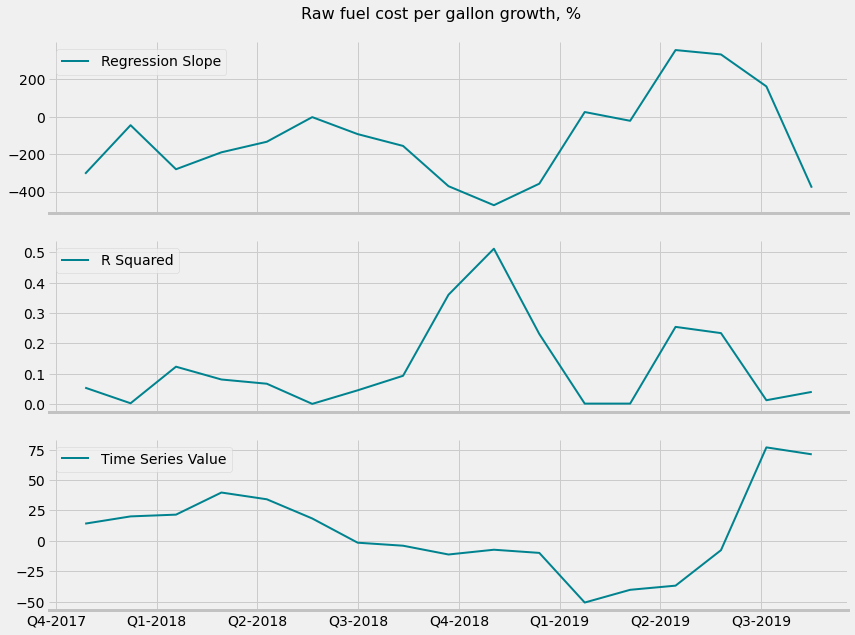

In [25]:
cdr.rolling_r_squared(df_data,
                      'z_E82OUG0135_MO_OS_Rawfuelcostpergallongrowth',
                      window=8,
                       y_name='alpha_1_day',
                      plot=True)

## Memo: All guidance at ALK

In [26]:
canalyst_search = cd.Search(config=config)
canalyst_search.search_guidance_time_series(ticker=canalyst_ticker,
                     most_recent=True)

Building guidance index...
Done


,ticker,CSIN,Path,Filename,time_series_description,time_series_name,Fiscal Period,Low,Mid,High,Type.1,Date,Link,search_matches
1010,ALK US,E82OUG0135,US Companies/Industrials/Transportation/Airlines,Alaska Air Group ALK US.xlsx,"CASM ex. fuel & special items growth, %",z_E82OUG0135_MO_OS_CASMexfuelspecialitemsgrowth,Q4-2021,0.07,0.08000,0.09,Estimate,2021-10-21 00:00:00,Investor Update,1
1009,ALK US,E82OUG0135,US Companies/Industrials/Transportation/Airlines,Alaska Air Group ALK US.xlsx,"Load Factor, %",MO_OS_LoadFactor,Q4-2021,0.77,0.78500,0.8,Estimate,2021-10-21 00:00:00,Investor Update,1
1008,ALK US,E82OUG0135,US Companies/Industrials/Transportation/Airlines,Alaska Air Group ALK US.xlsx,"Consolidated economic fuel expense per gallon, $/gal",MO_OS_FuelCost_Adj,Q4-2021,2.25,2.27500,2.3,Estimate,2021-10-21 00:00:00,Investor Update,1
1007,ALK US,E82OUG0135,US Companies/Industrials/Transportation/Airlines,Alaska Air Group ALK US.xlsx,"Total Revenue Growth, %",MO_GA_TotalRevenue,Q4-2021,-0.16,-0.17500,-0.19,Estimate,2021-10-21 00:00:00,Investor Update,1
1006,ALK US,E82OUG0135,US Companies/Industrials/Transportation/Airlines,Alaska Air Group ALK US.xlsx,"ASMs growth, %",MO_GA_ASM,Q4-2021,-0.13,-0.14500,-0.16,Estimate,2021-10-21 00:00:00,Investor Update,1
1004,ALK US,E82OUG0135,US Companies/Industrials/Transportation/Airlines,Alaska Air Group ALK US.xlsx,Net CFO,MO_CFS_CFO,Q4-2021,-100.0,-50.00000,0.0,Estimate,2021-10-21 00:00:00,Investor Update,1
1005,ALK US,E82OUG0135,US Companies/Industrials/Transportation/Airlines,Alaska Air Group ALK US.xlsx,Capex,MO_CFSum_Capex,FY2021,-225.0,-225.00000,-225.0,Estimate,2021-07-22 00:00:00,Investor Update,1
